In [ ]:
from keras.models import Sequential
import keras
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# model=Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),input_shape=(256,256,3),activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=64,activation='relu'))
# model.add(Dense(units=1,activation='sigmoid'))

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


In [ ]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1/255,horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1/255)


In [ ]:
train_set=train_gen.flow_from_directory('training',
                                        target_size=(256,256),batch_size=2,class_mode='binary', 
                                        shuffle=True,color_mode='rgb',seed=108)
validation_set=test_gen.flow_from_directory('validation',target_size=(256,256),
                                            batch_size=2,class_mode='binary', shuffle=True,
                                            color_mode='rgb',seed=108)
test_set=test_gen.flow_from_directory('test',target_size=(256,256),
                                      batch_size=1,class_mode='binary',shuffle=False,
                                      color_mode='rgb',seed=108)

Found 124 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
# from keras.callbacks import ModelCheckpoint
# filepath = "checkpoint_final.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose = 1,
#                              save_best_only = True, mode = 'max')



# callbacks_list = [checkpoint]

history = model.fit_generator(train_set, steps_per_epoch = len(train_set.filenames),
                    validation_data = validation_set,
                    validation_steps = len(validation_set.filenames),
                    epochs = 10,
                    verbose = 1,
                    )



Epoch 1/10
124/124 [==============================] - 17s 134ms/step - loss: 0.8089 - accuracy: 0.5565 - val_loss: 0.2803 - val_accuracy: 0.7222
Epoch 2/10
124/124 [==============================] - 16s 127ms/step - loss: 0.6239 - accuracy: 0.6935 - val_loss: 0.6025 - val_accuracy: 0.5556
Epoch 3/10
124/124 [==============================] - 15s 124ms/step - loss: 0.5888 - accuracy: 0.7661 - val_loss: 0.2949 - val_accuracy: 0.6667
Epoch 4/10
124/124 [==============================] - 16s 129ms/step - loss: 0.4513 - accuracy: 0.8347 - val_loss: 0.0712 - val_accuracy: 0.9444
Epoch 5/10
124/124 [==============================] - 15s 123ms/step - loss: 0.3317 - accuracy: 0.8992 - val_loss: 0.4435 - val_accuracy: 0.9444
Epoch 6/10
124/124 [==============================] - 16s 125ms/step - loss: 0.2153 - accuracy: 0.9153 - val_loss: 0.0471 - val_accuracy: 0.9444
Epoch 7/10
124/124 [==============================] - 15s 122ms/step - loss: 0.3452 - accuracy: 0.9355 - val_loss: 0.0484 - val_ac

In [ ]:
# save model and architecture to single file
model.save("models/model3.model")
print("Saved model to disk")

Saved model to disk


In [ ]:
model=keras.models.load_model("models/model3.model")

In [ ]:
predictions = model.predict_generator(test_set, steps=len(test_set), verbose=1)

40/40 [==============================] - 3s 74ms/step


In [ ]:
predictions

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.4062574e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.3552835e-01],
       [8.9007226e-05],
       [9.9910623e-01],
       [9.1483623e-01],
       [1.0000000e+00],
       [9.9999940e-01],
       [1.0000000e+00],
       [6.0407525e-01],
       [4.2437223e-01],
       [0.0000000e+00],
       [9.9990070e-01],
       [1.0000000e+00],
       [9.9996579e-01],
       [1.5119491e-02],
       [6.2884286e-02],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.8203360e-01],
       [1.0000000e+00],
       [9.9999988e-01],
       [1.0000000e+00],
       [9.9616963e-01],
       [9.9524128e-01],
       [9.9998748e-01],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.3111846e-02],
       [8.2801528e-02],
       [2.9135215e-05],
       [3.5082623e-05]], dtype=float32)

In [ ]:
y_pred_binary=(predictions>0.5).astype(np.int)
y_pred_binary

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
y_true=test_set.classes
y_true

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

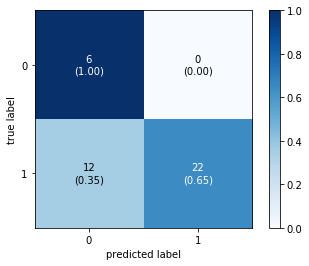

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true, y_pred_binary)
from mlxtend.plotting import plot_confusion_matrix
fig, ax=plot_confusion_matrix(conf_mat=cm,show_absolute=True,show_normed=True,colorbar=True,cmap='Blues')
plt.show()